# Introduction to PL/pgSQL parameter modes

The parameter modes determine the behaviors of parameters.

PL/pgSQL supports three parameter modes: `in`, `out`, and `inout`.
* Use the `in` mode if you want to pass a value to the function.
* Use the `out` mode if you want to return a value from a function.
* Use the `inout` mode when you want to pass in an initial value, update the value in the function, and return its updated value.

> A parameter takes the `in` mode by default if you do not explicitly specify it.

The following table illustrates the parameter modes:

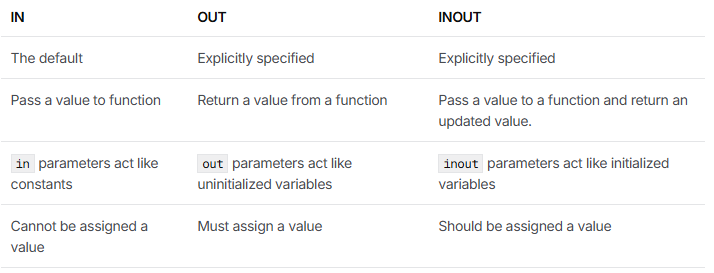

# The `IN` mode

The following function finds a film by its id and returns the title of the film:

```postgresql
create or replace function find_film_by_id(p_film_id int)
returns varchar
language plpgsql
as $$
declare
   film_title film.title%type;
begin
  -- find film title by id
  select title
  into film_title
  from film
  where film_id = p_film_id;

  if not found then
     raise 'Film with id % not found', p_film_id;
  end if;

  return film_title;

end;$$
```

Because we don’t specify the mode for the `p_film_id` parameter, it takes the `in` mode by default.

The following shows how to call the `find_film_by_id()` function to find the title of the film with the id `100`:

```postgresql
select * from find_film_by_id(1); 
```

**Output:**

```
find_film_by_id
------------------
 Academy Dinosaur
(1 row)
```

# The `OUT` mode

The `out` parameters are defined as a part of the argument list and are returned as a part of the result.

The `out` parameters are very useful in functions that need to return multiple values.

To define `out` parameters, you explicitly precede the parameter name with the `out` keyword as follows:

```postgresql
out parameter_name type
```

The following example defines the `get_film_stat` function that has three `out` parameters:

```postgresql
create or replace function get_film_stat(
    out min_len int,
    out max_len int,
    out avg_len numeric)
language plpgsql
as $$
begin

  select min(length),
         max(length),
		 avg(length)::numeric(5,1)
  into min_len, max_len, avg_len
  from film;

end;$$ 
```

In the `get_film_stat` function, we select the **min**, **max**, and **average** film length from the `film` table using the `min`, `max`, and `avg` aggregate functions and assign the results to the corresponding `out` parameters.

The following statement calls the `get_film_stat` function:
```postgresql
select get_film_stat();
```

**Output:**

```
get_film_stat
----------------
 (46,185,115.3)
(1 row)
```

The output of the function is a record. 

To make the output separated as columns, you use the following statement:

```postgresql
select * from get_film_stat();
```

**Output:**

```
min_len | max_len | avg_len
---------+---------+---------
      46 |     185 |   115.3
(1 row)
```


# The `INOUT` mode

The `inout` mode is the combination of the `in` and `out` modes.
* It means that the caller can pass an argument to a function.
* The function changes the argument and returns the updated value.

The following swap function accepts two integers and swaps their values:

```postgresql
create or replace function swap(
	inout x int,
	inout y int
)
language plpgsql
as $$
begin
   select x,y into y,x;
end; $$; 
```

The following statement calls the `swap()` function:

```postgresql
select * from swap(10,20); 
```

**Output:**

```
x  | y
----+----
 20 | 10
(1 row)
```